<a href="https://www.kaggle.com/code/mehrdadsadeghi/tps-july2022-clustering-challenge-eda?scriptVersionId=100401274" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 id="adda" style="color:white;background:#0087B6;padding:8px;border-radius:8px"> TPS - JULY 2022 - Unsupervised clustering challenge </h1>

### Problem definition :

* In this challenge, we are given a dataset where each row belongs to a particular cluster. our job is to predict the cluster each row belongs to .

### Data :
* data.csv - the file includes **continuous** and **categorical** data; your task is to predict which rows should be clustered together in a control state

* sample_submission.csv - a sample submission file in the correct format, where Predicted is the predicted control state


<h1 id="addfdsda" style="color:white;background:#0087B6;padding:8px;border-radius:8px"> Libraries </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA #Only for visualizing
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import MinMaxScaler,RobustScaler,QuantileTransformer,MaxAbsScaler,PowerTransformer,Normalizer
import plotly.express as px

sns.set()

<h1 id="adhdeyda" style="color:white;background:#0087B6;padding:8px;border-radius:8px">Loading the data </h1>

In [2]:
data = pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv')
sub = pd.read_csv('../input/tabular-playground-series-jul-2022/sample_submission.csv')

data

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


<h1 id="awdjjjja" style="color:white;background:#0087B6;padding:8px;border-radius:8px"> Info </h1>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

<h3 class="alert alert-info"> Data has no missing values </h3>


# Drop id

In [4]:
data=data.drop('id',axis=1)

<h1 id="addawwdda" style="color:white;background:#0087B6;padding:8px;border-radius:8px"> Correlation between continuous features </h1>

In [5]:
Continuous_Features = data.select_dtypes(include='float')
Cat_features = data.select_dtypes(include='int')

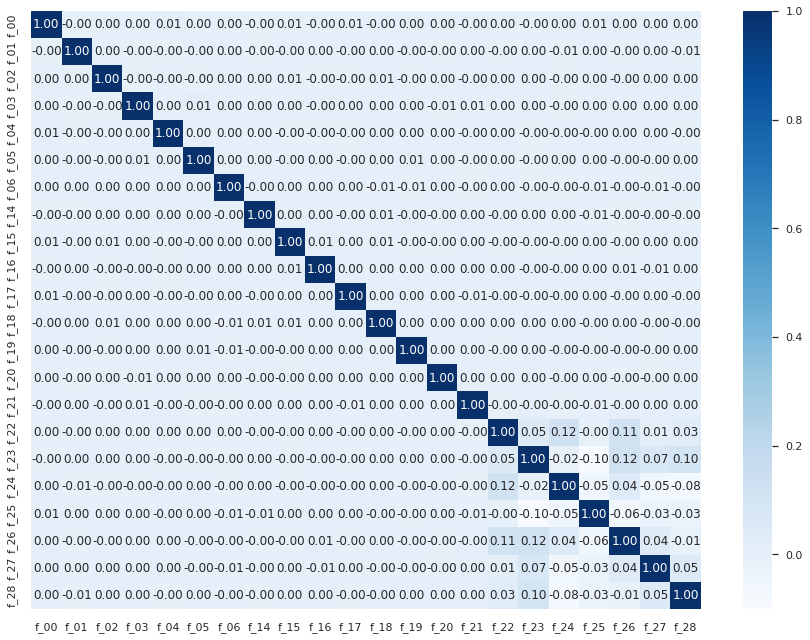

In [6]:
plt.figure(figsize = ( 15 , 11 ))
sns.heatmap(Continuous_Features.corr(),annot=True,fmt=".2f", cmap='Blues');

<h3 class="alert alert-info"> Features are not much correlated with each other </h3>

<h1 id="addawrjda" style="color:white;background:#0087B6;padding:8px;border-radius:8px"> Continuous features distribution </h1>

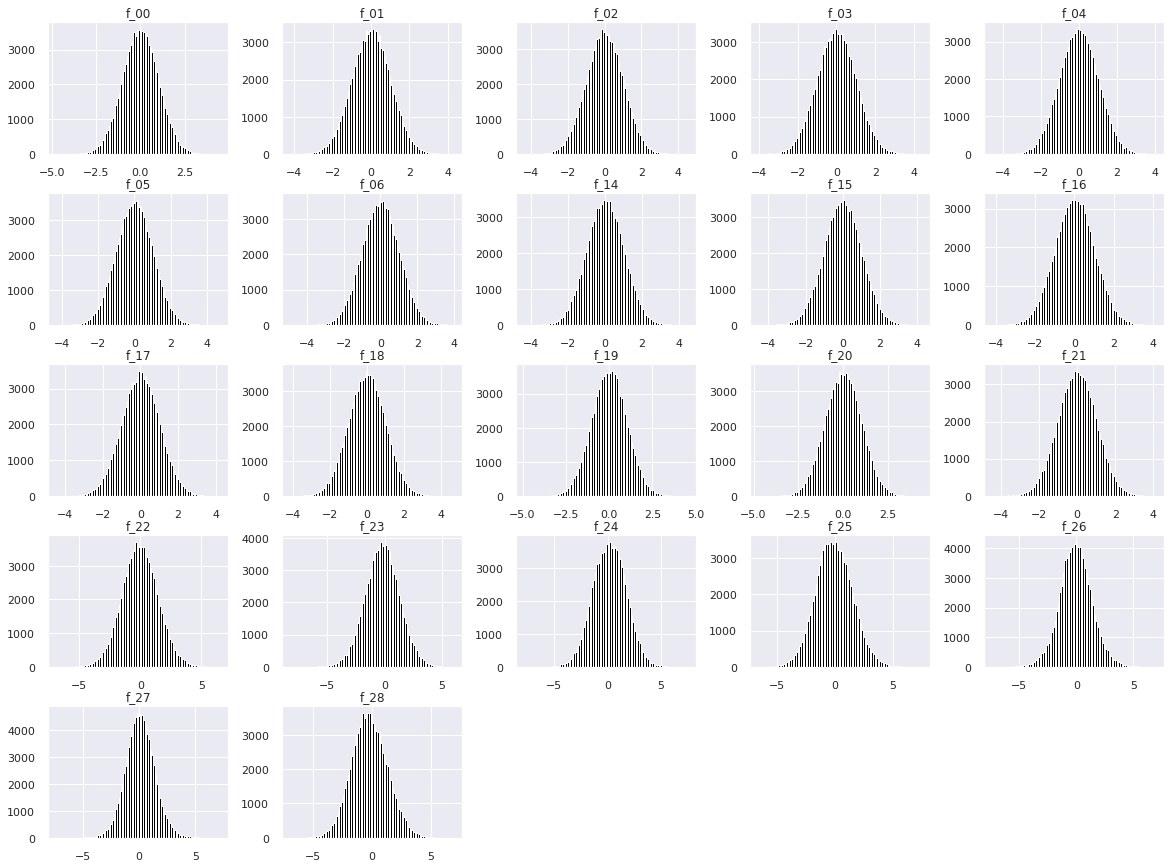

In [7]:
Continuous_Features.hist(figsize=(20,15),bins=100,color='#000');

<h3 class="alert alert-info"> Numeric features have approximately normal distribution </h3>

<h1 id="addawrjda" style="color:white;background:#0087B6;padding:8px;border-radius:8px"> Cardinality of categorical features </h1>

In [8]:
for col in Cat_features.columns:
    print(col,': ', data[col].nunique())

f_07 :  32
f_08 :  29
f_09 :  45
f_10 :  37
f_11 :  29
f_12 :  39
f_13 :  30


<h1 id="addaggdd" style="color:white;background:#0087B6;padding:8px;border-radius:8px"> Boxplot features </h1>

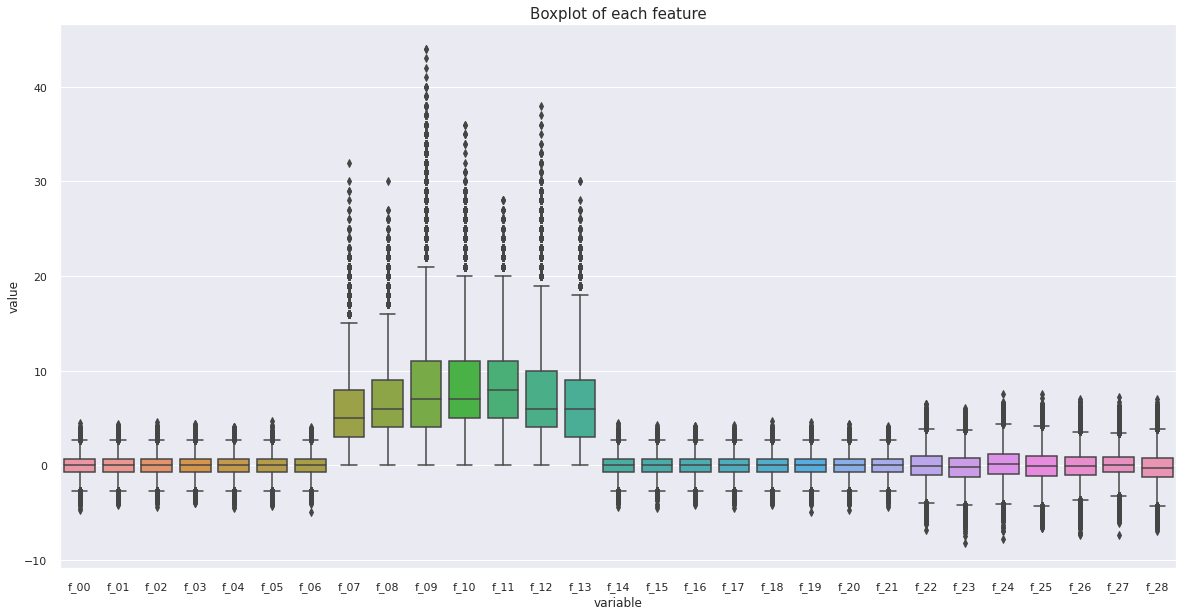

In [9]:
tmp_df = pd.DataFrame(data = data, columns = data.columns.to_list())
plt.figure(figsize=(20,10)) 
sns.boxplot(x="variable", y="value", data=pd.melt(tmp_df)).set_title('Boxplot of each feature',size=15)

plt.show()

<h3 class="alert alert-info"> We can see the difference between categorical and numeric features  </h3>

<h1 id="agrywdda" style="color:white;background:#0087B6;padding:8px;border-radius:8px"> Preprocessing </h1>


In [10]:
#Scaler
MaxAbs =  MaxAbsScaler()

#Transformer
Power_transformer = PowerTransformer()

def Scale_transform(X):
    X = MaxAbs.fit_transform(X)
    X = Power_transformer.fit_transform(X)
    X= pd.DataFrame(X, columns = data.columns)
    return X

In [11]:
X_scaled = Scale_transform(data)

# Boxplot after preprocessing

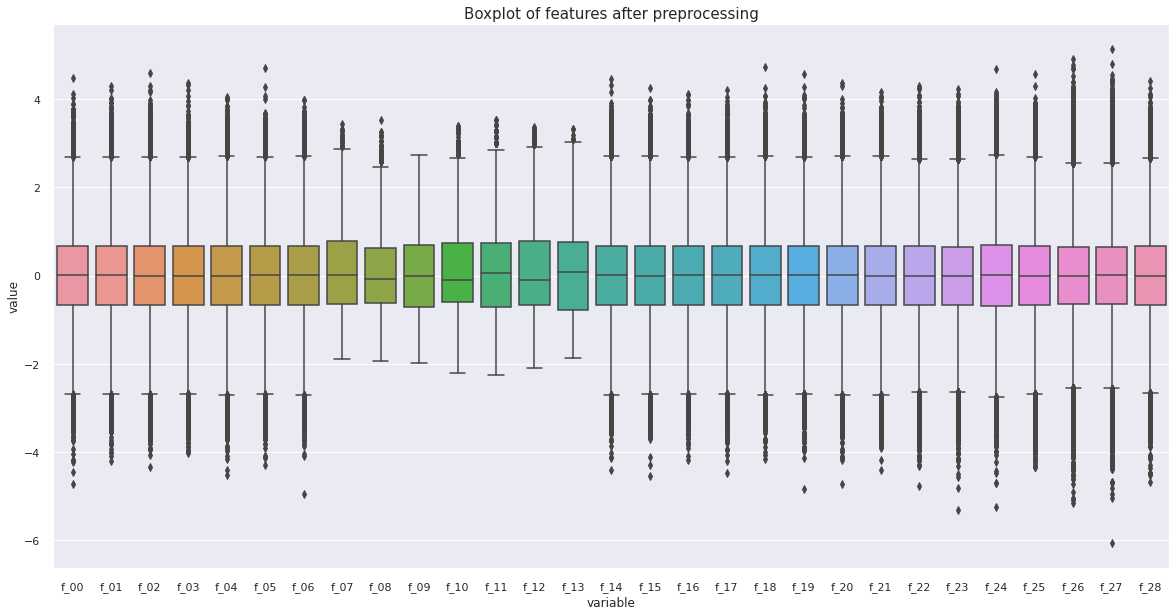

In [12]:
tmp_df = pd.DataFrame(data = X_scaled, columns = data.columns.to_list())
plt.figure(figsize=(20,10)) 
sns.boxplot(x="variable", y="value", data=pd.melt(tmp_df)).set_title('Boxplot of features after preprocessing',size=15)

plt.show()

<h1 id="adggddweda" style="color:white;background:#0087B6;padding:8px;border-radius:8px"> Finding optimal number of clusters using K-means </h1>

The number of clusters that we choose for a given dataset cannot be random. Each cluster is formed by calculating and comparing the distances of data points within a cluster to its centroid. An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS)

## Kmeans Clustering and storing WCSS for each K

In [13]:
#Clustering function
def cluster(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)
    return kmeans


# Clustering and storing WCSS for each K
WCSS = []

for k in range(1, 15):
    kmeans = cluster(k)
    WCSS.append(kmeans.inertia_)

## Plot WCSS against number of clusters

In [14]:
px.line(x=range(1,15), y=WCSS ,
       labels={'y':'WCSS', 'x':'Number of clusters'},
       title="Investigate K-means clustering")

## An easier way: Use KElbowVisualizer to get the exact value of elbow point
For more information read the documentation [here](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

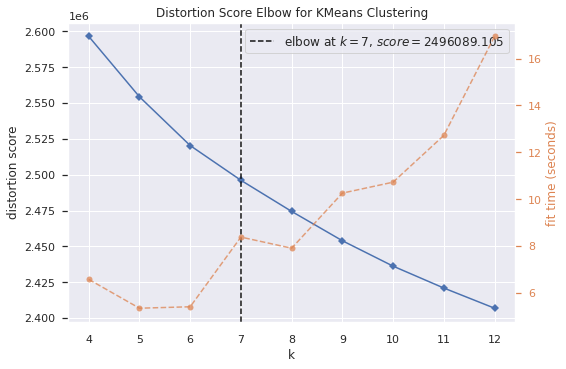

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<h3 class="alert alert-info"> The Elbow method suggests 7 as optimal number of clusters</h3>

<h1 id="addffswtjuja" style="color:white;background:#0087B6;padding:8px;border-radius:8px"> Clustering </h1>

## K-means

In [16]:
# Do kmeans clustering
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_scaled)
preds=kmeans.predict(X_scaled)

In [17]:
sub['Predicted']=preds
sub.to_csv('submission_Kmeans.csv',index=False)

<h3 class="alert alert-info"> Submission score : 0.25114 </h3>

## Bayesian Gaussian Mixture

In [18]:
preds = BayesianGaussianMixture(n_components=7,
                                covariance_type='full',
                                max_iter=1000,
                                n_init=3,
                                random_state=1).fit_predict(X_scaled)

In [19]:
# Create submission file
sub['Predicted']=preds
sub.to_csv('submission.csv',index=False)

<h1 id="addffswtjuja" style="color:white;background:#0087B6;padding:8px;border-radius:8px"> PCA & visualize clusters

In [20]:
pca = PCA(n_components=3)

PCA_DF = pd.DataFrame(pca.fit_transform(X_scaled), columns=(["col1","col2","col3"]))
PCA_DF["Cluster"]=preds


In [21]:
# Plot 10% of the data
fig = px.scatter_3d(PCA_DF.sample(n=9800), x='col1', y='col2', z='col3',
              color='Cluster')
fig.show()

### Still working on it . . .

### If you have time take a look at my other notebooks [here](https://www.kaggle.com/mehrdadsadeghi/code)

## Credits 

* https://www.kaggle.com/code/gemartin/load-data-reduce-memory-usage/notebook
* https://www.kaggle.com/code/sfktrkl/tps-july-2022/notebook?scriptVersionId=99952091